In [1]:
import fastf1.plotting
import f1analytics as f1

In [2]:
fastf1.plotting.setup_mpl(color_scheme='fastf1')

session_year_24 = 2024
session_name = "Baku Grand Prix"

# Load Q session from 2024 for comparison
q_24_session_type = 'Q'
q_24_session = fastf1.get_session(session_year_24, session_name, q_24_session_type)
q_24_session.load()
q_24_laps = q_24_session.laps

# Load Qualifying session 2025
session_year_25 = 2025
q_25_session_type = 'Q'
q_25_session = fastf1.get_session(session_year_25, session_name, q_25_session_type)
q_25_session.load()
q_25_laps = q_25_session.laps

req         WARNING 	DEFAULT CACHE ENABLED! (3.38 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '11', '63', '1', '44', '14', '43', '23', '50', '22', '27', '18', '3', '10', '4', '77', '24', '31']
core      

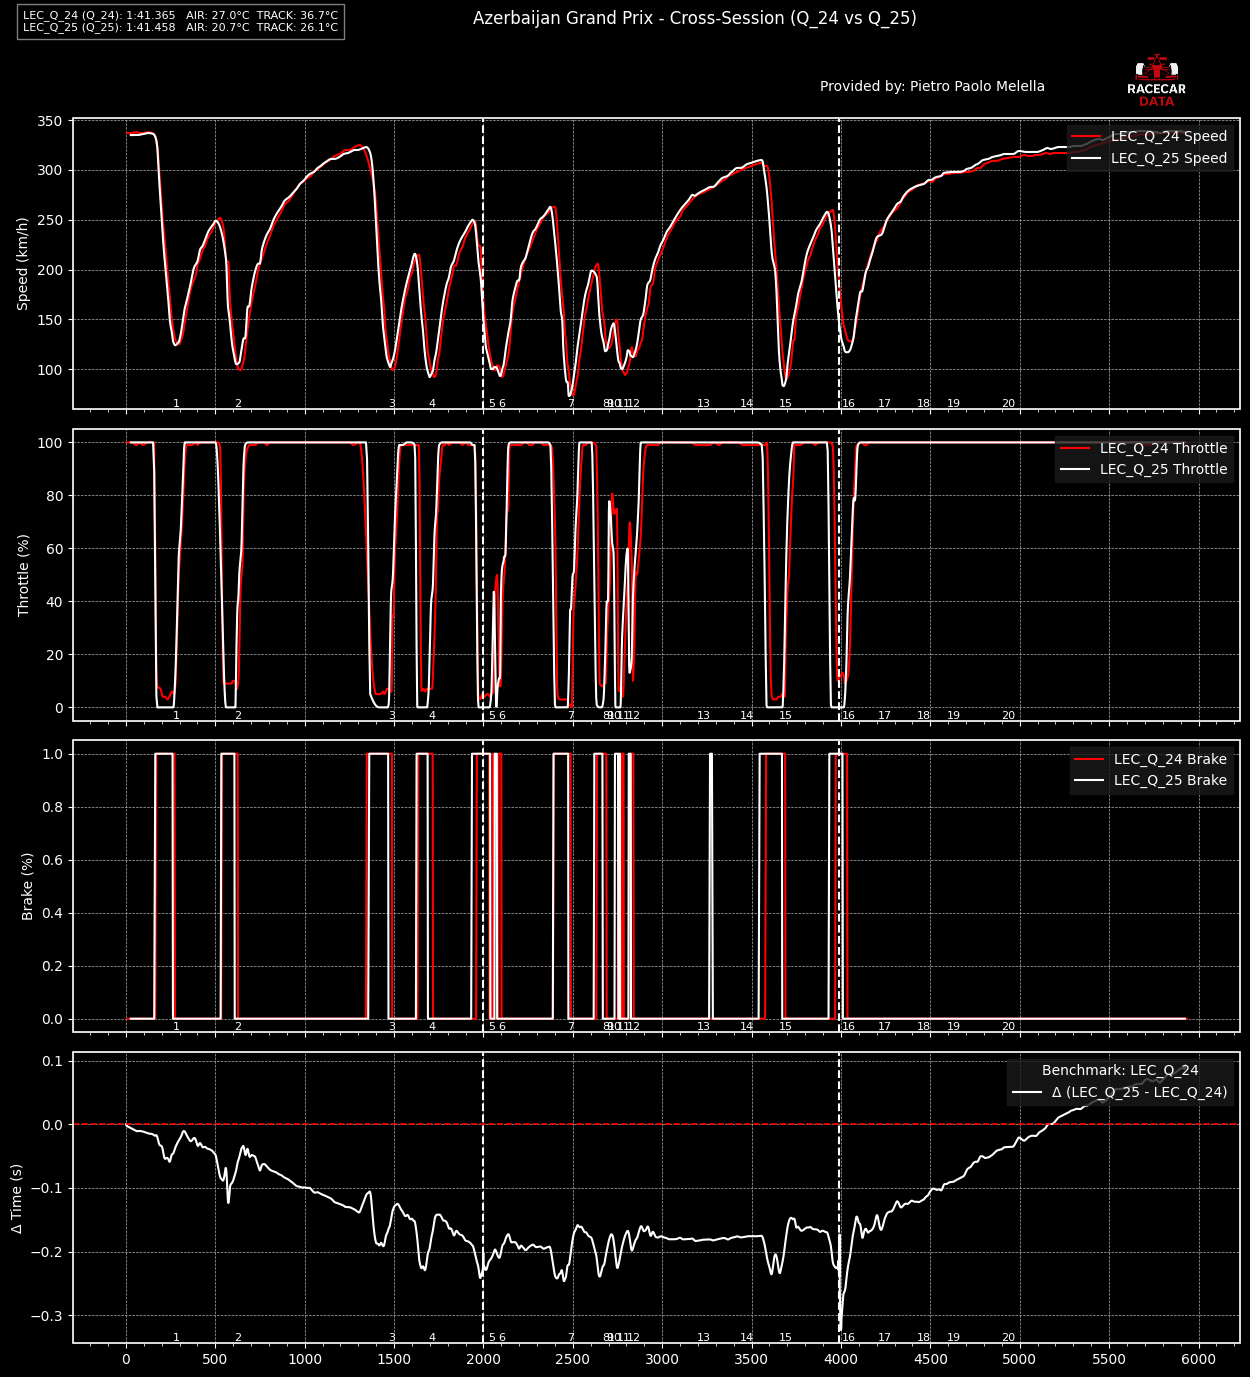

In [3]:
# Load your sessions
sessions_data = {
    'Q_24': {'session': q_24_session, 'session_name': 'Baku GP', 'year': 2024, 'session_type': 'Q_24'},
    'Q_25': {'session': q_25_session, 'session_name': 'Baku GP', 'year': 2025, 'session_type': 'Q_25'}
}

# Create the analyzer
cross_session_t = f1.cross_session_telemetry.CrossSessionTelemetry(sessions_data)

# Compare laps with custom channels
cross_session_t.compare_laps([
    ('Q_24', 'LEC', 'fastest'),
    ('Q_25', 'LEC', 'fastest')
], channels=['Speed', 'Throttle', 'Brake', 'Delta'])

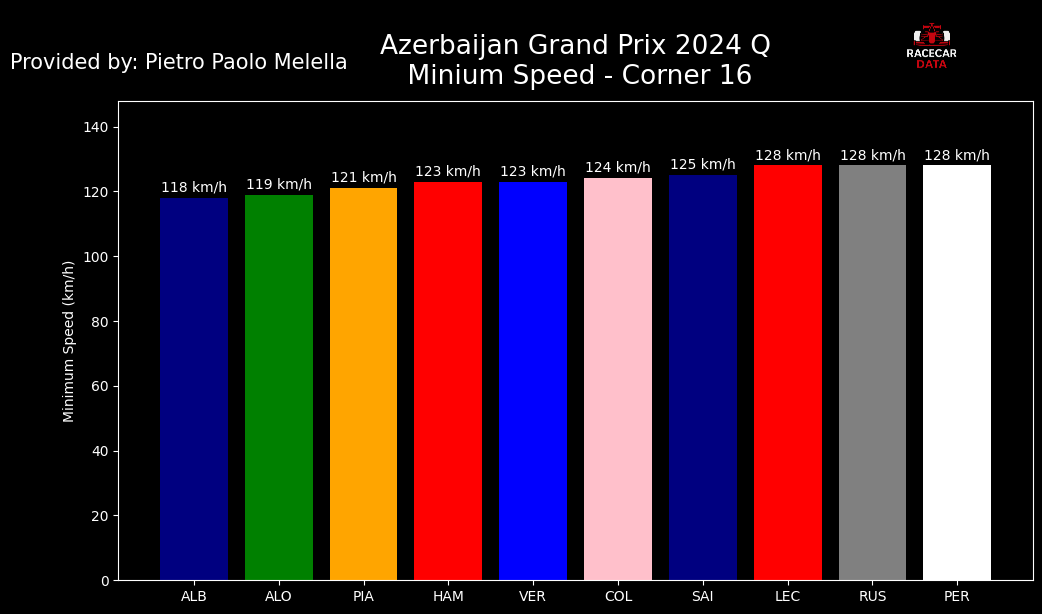

In [4]:
msc1 = f1.min_speed_corner.CornerMinSpeed(
    q_24_session, session_name, session_year_24, "Q",
    corner_idxs=[16], after=30, before=30, n_drivers=10
).plot()

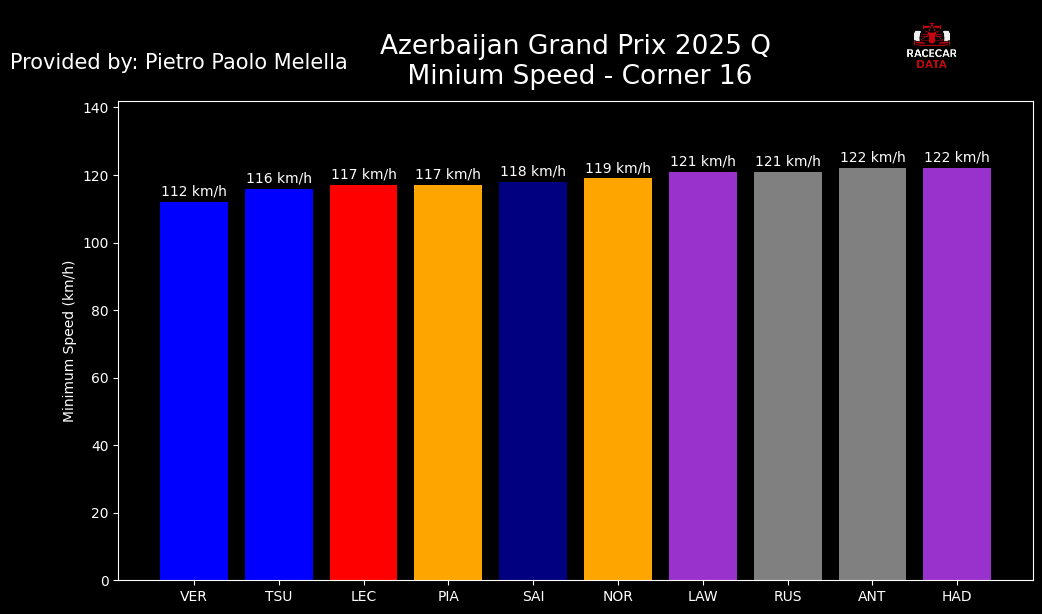

In [5]:
msc1 = f1.min_speed_corner.CornerMinSpeed(
    q_25_session, session_name, session_year_24, "Q",
    corner_idxs=[16], after=30, before=30, n_drivers=10
).plot()